In [72]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
mDF = pd.read_csv('bollywood.csv')
mDF.info()
mDF.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


(149, 10)

In [73]:
mDF.head(5)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [74]:
genre_counts = mDF['Genre'].value_counts()
print(genre_counts)
max = genre_counts.idxmax()
print(max)

Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: count, dtype: int64
Comedy


In [75]:
pd.crosstab(mDF['Genre'],mDF['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


In [76]:
mDF['Release Date'] = pd.to_datetime(mDF['Release Date'])
mDF['Month'] = mDF['Release Date'].dt.month_name()
mDF['Month'].value_counts()

C:\Users\areeb\AppData\Local\Temp\ipykernel_28004\1855180364.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mDF['Release Date'] = pd.to_datetime(mDF['Release Date'])


Month
January      20
March        19
May          18
July         16
February     16
April        11
September    10
June         10
November     10
October       9
August        8
December      2
Name: count, dtype: int64

In [77]:
highBudgetMovies = mDF[mDF['Budget']>=25]
highBudgetMovies['Month'].value_counts()

Month
February     9
January      8
March        7
August       7
November     6
July         6
September    5
June         5
April        4
October      4
May          3
December     2
Name: count, dtype: int64

In [97]:
mDF['ROI'] = mDF.apply(lambda row: ((row['BoxOfficeCollection']-row['Budget'])/row['Budget']),axis=1)
mDF.sort_values('ROI',ascending=False)[0:10]

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month,ROI
64,65,2013-04-26,Aashiqui 2,N,Romance,12,110.0,2926673,4944,628,April,8.166667
89,90,2014-12-19,PK,HS,Drama,85,735.0,13270623,43767,5693,December,7.647059
132,133,2013-09-13,Grand Masti,LW,Comedy,35,298.0,1795640,3015,721,September,7.514286
135,136,2013-09-20,The Lunchbox,N,Drama,10,85.0,1064854,4054,285,September,7.500000
87,88,2013-06-14,Fukrey,N,Comedy,5,36.2,227912,222,39,June,6.240000
58,59,2014-09-05,Mary Kom,N,Drama,15,104.0,6086811,26560,1647,September,5.933333
128,129,2013-10-18,Shahid,FS,Drama,6,40.0,1148516,3155,396,October,5.666667
37,38,2014-07-11,Humpty Sharma Ki Dulhania,N,Romance,20,130.0,6604595,14535,2208,July,5.500000
101,102,2013-07-12,Bhaag Milkha Bhaag,N,Drama,30,164.0,2635390,4622,456,July,4.466667
115,116,2013-08-09,Chennai Express,FS,Comedy,75,395.0,1882346,7954,1593,August,4.266667


In [79]:
mDF.groupby('ReleaseTime')['ROI'].mean().reset_index()

,ReleaseTime,ROI
0,FS,0.973853
1,HS,0.850867
2,LW,1.127205
3,N,0.657722


Text(0, 0.5, 'Number of Movies')

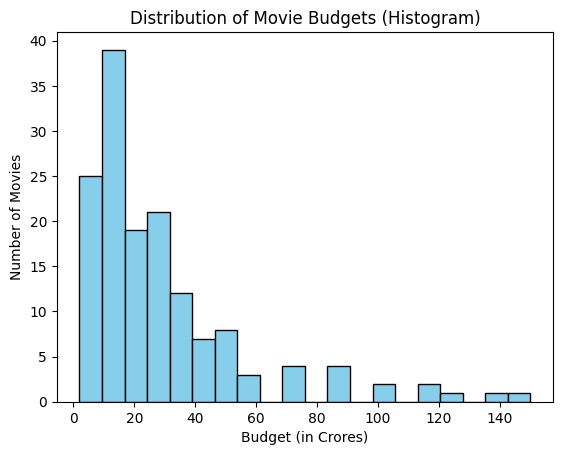

In [80]:
plt.hist(mDF['Budget'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Movie Budgets (Histogram)")
plt.xlabel("Budget (in Crores)")
plt.ylabel("Number of Movies")

Text(0, 0.5, 'Density')

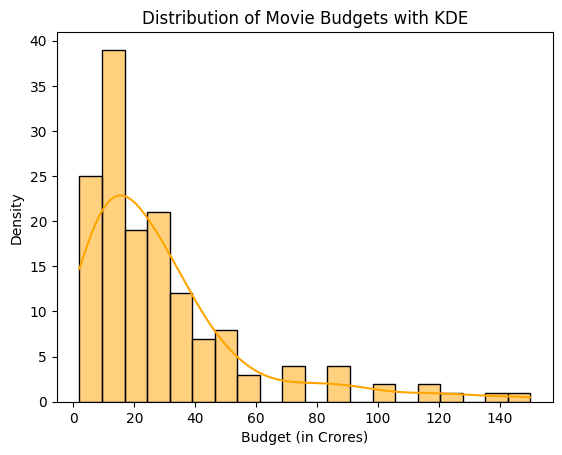

In [81]:
sn.histplot(mDF['Budget'], kde=True, bins=20, color='orange')
plt.title("Distribution of Movie Budgets with KDE")
plt.xlabel("Budget (in Crores)")
plt.ylabel("Density")

<Axes: xlabel='ROI', ylabel='Density'>

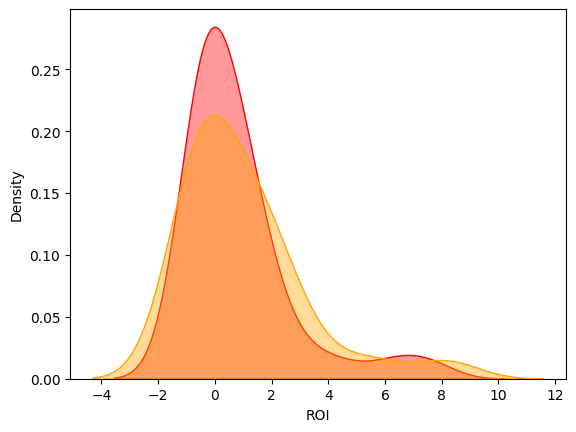

In [109]:
comedy = mDF[mDF['Genre']=='Comedy']
drama = mDF[mDF['Genre']=='Romance']
sn.kdeplot(comedy['ROI'], label='Comedy', fill=True, color='red', alpha=0.4)
sn.kdeplot(drama['ROI'], label='Drama', fill=True, color='orange', alpha=0.4)





In [110]:
mDF['BoxOfficeCollection'].corr(mDF['YoutubeLikes'])

0.6825165877731297

<Axes: xlabel='Genre', ylabel='YoutubeLikes'>

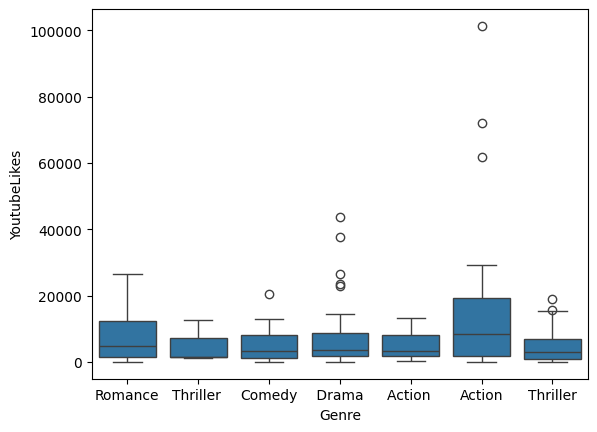

In [113]:
sn.boxplot(data=mDF, x='Genre', y='YoutubeLikes')

<Axes: >

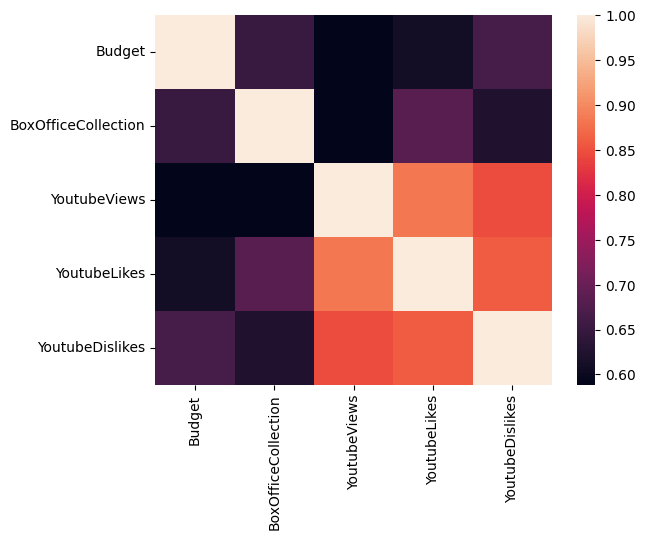

In [119]:
corr_cols = ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']
corr_matrix = mDF[corr_cols].corr()
sn.heatmap(corr_matrix)